# Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

from pycaret.classification import setup
from pycaret.classification import compare_models
from pycaret.classification import tune_model

In [4]:
import tensorflow as tf
from tensorflow import keras

### Check for GPU

In [5]:
len(tf.config.experimental.list_physical_devices('GPU'))

1

# Import Train and Test Files

In [6]:
train=pd.read_csv("train_file.csv", parse_dates=["APPLICATION CREATED DATE", "APPLICATION REQUIREMENTS COMPLETE", "PAYMENT DATE",
                                                 "LICENSE TERM START DATE", "LICENSE TERM EXPIRATION DATE", "LICENSE APPROVED FOR ISSUANCE",
                                                 "DATE ISSUED",	"LICENSE STATUS CHANGE DATE"], low_memory=False)
train

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,22.0,28.0,22-28,10.0,1010,Limited Business License,35342.0,RENEW,NaT,2002-06-28,2002-08-21,N,2002-08-16,2003-08-15,2002-08-21,2006-04-11,NaT,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,1315,Mobile Food Dispenser,1358463.0,RENEW,NaT,2005-09-22,2005-11-03,N,2005-11-16,2006-11-15,2006-04-05,2006-06-12,2006-06-15,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,NaN,NaN,NaN,NaN,1011,Home Repair,1980233.0,ISSUE,2009-06-29,2009-07-22,2009-07-22,N,2009-07-22,2011-07-15,2009-07-22,2009-07-22,NaT,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,NaN,NaN,NaN,NaN,1010,Limited Business License,1476582.0,ISSUE,2004-02-10,2004-02-10,2004-02-10,N,2004-02-11,2005-02-15,2004-02-10,2004-02-11,NaT,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,NaN,NaN,NaN,NaN,1010,Limited Business License,1141408.0,RENEW,NaT,2008-03-24,2008-06-04,N,2008-05-16,2010-05-15,2008-06-04,2008-06-05,NaT,NaN,NaN,NaN,NaN,AAI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85890,12652-20120516,2143400,8011,1,UNITED PARCEL SERVICE,UNITED PARCEL SERVICE,1400 S JEFFERSON ST,CHICAGO,IL,60607,11.0,28.0,11-28,1.0,1008,Hazardous Materials,12652.0,RENEW,NaT,2012-03-15,2012-05-07,N,2012-05-16,2014-05-15,2012-05-07,2012-05-08,2012-12-29,NaN,41.863501,-87.642210,"{'latitude': '41.86350135244771', 'longitude':...",AAC
85891,1821421-20070522,1821421,317725,1,"EXPRESS BOARD UP SERVICE, INC.","EXPRESS BOARD UP SERVICE, INC.",8707 VANGUARD DR,MACHESNEY PARK,IL,61115,NaN,NaN,NaN,NaN,1800,Board-Up Work,1821421.0,ISSUE,2007-05-21,2007-05-22,2007-05-22,N,2007-05-22,2009-06-15,2007-05-22,2007-05-22,NaT,NaN,NaN,NaN,NaN,AAI
85892,74137-20090116,1939358,8458,2,ARAMARK SMMS LLC,ARAMARK FACILITY SERVICES,2300 WARRENVILLE RD 1ST,DOWNERS GROVE,IL,60515,NaN,NaN,NaN,NaN,1010,Limited Business License,74137.0,RENEW,NaT,2008-11-14,2009-01-09,N,2009-01-16,2011-01-15,2009-01-09,2009-12-08,NaT,NaN,NaN,NaN,NaN,AAI
85893,2049545-20111016,2110060,2156,43,GENERAL NUTRITION CORPORATION,GENERAL NUTRITION CENTER # 61,5151 S PULASKI RD SLAB ON GRADE T-21,CHICAGO,IL,60632.0,23.0,NaN,23-,NaN,1010,Limited Business License,2049545.0,RENEW,NaT,2011-08-15,2011-10-03,N,2011-10-16,2013-10-15,2011-10-03,2011-10-11,2012-05-08,NaN,41.799012,-87.723181,"{'latitude': '41.79901235310339', 'longitude':...",AAC


## All the columns present in train

In [7]:
train.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'LICENSE NUMBER', 'APPLICATION TYPE',
       'APPLICATION CREATED DATE', 'APPLICATION REQUIREMENTS COMPLETE',
       'PAYMENT DATE', 'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'SSA', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'LICENSE STATUS'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   ID                                 85895 non-null  object        
 1   LICENSE ID                         85895 non-null  int64         
 2   ACCOUNT NUMBER                     85895 non-null  int64         
 3   SITE NUMBER                        85895 non-null  int64         
 4   LEGAL NAME                         85895 non-null  object        
 5   DOING BUSINESS AS NAME             85894 non-null  object        
 6   ADDRESS                            85895 non-null  object        
 7   CITY                               85895 non-null  object        
 8   STATE                              85895 non-null  object        
 9   ZIP CODE                           85864 non-null  object        
 10  WARD                              

In [8]:
test=pd.read_csv("test_file.csv", parse_dates=["APPLICATION CREATED DATE", "APPLICATION REQUIREMENTS COMPLETE", "PAYMENT DATE",
                                                 "LICENSE TERM START DATE", "LICENSE TERM EXPIRATION DATE", "LICENSE APPROVED FOR ISSUANCE",
                                                 "DATE ISSUED",	"LICENSE STATUS CHANGE DATE"], low_memory=False)

##Make a copy of Test
test_OG=test
test

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,1516615-20120216,2132209,280120,1,RS HOMES I LLC,RS HOMES I LLC,350 W HUBBARD ST 3 300,CHICAGO,IL,60610.0,42.0,67.0,42-67,18.0,1020,Residential Real Estate Developer,1516615.0,RENEW,NaT,2011-12-15,2012-01-19,N,2012-02-16,2014-02-15,2012-01-19,2012-01-20,2012-12-29,NaN,41.890047,-87.637467,"{'latitude': '41.89004724888915', 'longitude':..."
1,69813-20110616,2090759,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,2101 W 59TH ST 1ST,CHICAGO,IL,60636.0,16.0,5.0,16-5,7.0,1010,Limited Business License,69813.0,RENEW,NaT,2011-04-15,2012-11-02,N,2011-06-16,2013-06-15,2012-11-02,2012-11-05,2012-12-29,NaN,41.786485,-87.676665,"{'latitude': '41.786485235679486', 'longitude'..."
2,1519227-20041116,1541990,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,1133 S WABASH AVE 1ST,CHICAGO,IL,60605.0,4.0,8.0,4-8,1.0,1020,Residential Real Estate Developer,1519227.0,RENEW,NaT,2004-09-27,2004-12-06,N,2004-11-16,2005-11-15,2004-12-06,2004-12-07,NaT,NaN,41.868269,-87.625695,"{'latitude': '41.86826924843568', 'longitude':..."
3,1922025-20100816,2041053,335243,1,ANNA F. JAMISON,ANNA F. JAMISON,13156 S FORRESTVILLE AVE,CHICAGO,IL,60827.0,9.0,33.0,9-33,5.0,1607,"Peddler, non-food, special",1922025.0,RENEW,NaT,2010-06-15,2010-11-04,N,2010-08-16,2012-08-15,NaT,2010-11-04,2012-12-31,NaN,41.655762,-87.608686,"{'latitude': '41.65576175146191', 'longitude':..."
4,1675683-20070816,1837158,283018,3,MARINCA A. COVARRUBIAS,DETAILS,4208 S ARCHER AVE,CHICAGO,IL,60632.0,15.0,26.0,15-26,9.0,1010,Limited Business License,1675683.0,RENEW,NaT,2007-06-21,2007-08-15,N,2007-08-16,2009-06-15,2007-08-15,2007-08-16,2008-03-26,39.0,41.816969,-87.699785,"{'latitude': '41.81696910012824', 'longitude':..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57234,1743194-20070816,1835677,266103,3,"GOODHEALTH MEDICAL PRODUCTS, INC.","GOODHEALTH MEDICAL PRODUCTS, INC.",2621 W 79TH ST,CHICAGO,IL,60652.0,18.0,14.0,18-14,8.0,1010,Limited Business License,1743194.0,RENEW,NaT,2007-06-21,2007-09-12,N,2007-08-16,2009-11-15,2007-09-12,2007-09-18,2008-03-17,NaN,41.749842,-87.688733,"{'latitude': '41.74984206916219', 'longitude':..."
57235,2032383-20160716,2465962,63376,180,INTERPARK LLC,INTERPARK,505 N STATE ST 2-4,CHICAGO,IL,60654.0,42.0,22.0,42-22,18.0,1002,Accessory Garage,2032383.0,RENEW,NaT,2016-05-15,2016-06-23,N,2016-07-16,2018-07-15,2016-06-23,2016-08-11,2018-01-09,NaN,41.891055,-87.627898,"{'latitude': '41.89105524147196', 'longitude':..."
57236,40376-20020216,1211199,55051,1,YUN HEE HWANG,TOP CLEANERS,1201 W ROSCOE ST 1ST,CHICAGO,IL,60657.0,44.0,9.0,44-9,19.0,1010,Limited Business License,40376.0,RENEW,NaT,2001-12-20,2002-01-18,N,2002-02-16,2003-02-15,2002-01-18,2002-01-22,NaT,NaN,41.943382,-87.659191,"{'latitude': '41.94338183750669', 'longitude':..."
57237,2064176-20121116,2188497,357381,1,D. C. A. TOWING INCORPORATED,D. C. A. TOWING INCORPORATED,7052 W 64TH ST 1ST,CHICAGO,IL,60638.0,23.0,18.0,23-18,8.0,1012,Home Occupation,2064176.0,RENEW,NaT,2012-09-14,2012-12-25,N,2012-11-16,2014-11-15,2012-12-25,2012-12-26,2012-12-29,NaN,41.775710,-87.798009,"{'latitude': '41.775709631013335', 'longitude'..."


## All the columns present in test

In [5]:
test.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'LICENSE NUMBER', 'APPLICATION TYPE',
       'APPLICATION CREATED DATE', 'APPLICATION REQUIREMENTS COMPLETE',
       'PAYMENT DATE', 'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'SSA', 'LATITUDE',
       'LONGITUDE', 'LOCATION'],
      dtype='object')

# Correlation matrix.

With the help of the correlation matrix we can see the dependancy of the attributes. From below we cann identify that the Account number is closely related to the Liscence Number.
The Attriburtes WARD and LATITUDE have a high correlation. 

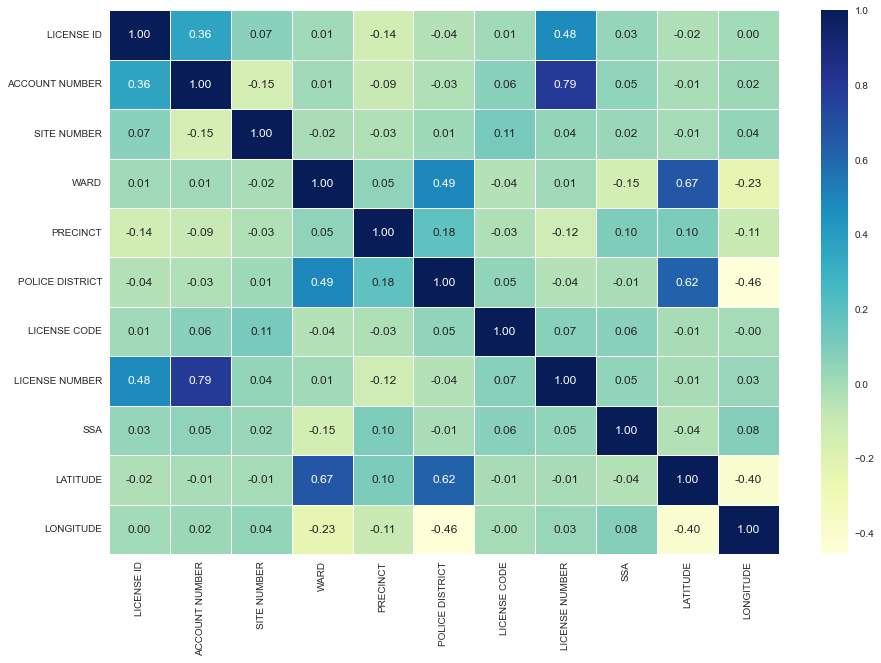

In [62]:
corr_matrix = train.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

# Checking Target column

In [8]:
train["LICENSE STATUS"].value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

# Converting Objects into Categorical Values and Filling Null Values

In [9]:
def preprocess_data(df):
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            # df[label+"_is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1        
    
    return df

In [10]:
df_train=preprocess_data(train)
df_train

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,72269,1256593,32811,1,6187,8530,15930,194,17,1384,22.0,28.0,689,10.0,1010,47,35342.0,5,0,268,318,1,178,97,246,1063,0,25.0,41.843613,-87.714618,6461,2
1,19974,1639294,262311,29,16619,18724,17069,194,17,1373,33.0,23.0,1230,17.0,1315,52,1358463.0,5,0,1082,1151,1,973,113,1196,1106,1047,60.0,41.961132,-87.699626,17793,1
2,53815,1980233,345008,1,10099,11350,7370,467,17,928,30.0,26.0,0,14.0,1011,35,1980233.0,4,2028,2048,2291,1,1890,199,2174,1881,0,28.0,41.892679,-87.673321,0,2
3,25063,1476582,273121,1,1959,2277,38381,586,17,1185,30.0,26.0,0,14.0,1010,47,1476582.0,4,688,676,702,1,532,105,625,526,0,28.0,41.892679,-87.673321,0,2
4,4313,1896750,213785,1,23911,25228,24569,1146,17,990,30.0,26.0,0,14.0,1010,47,1141408.0,5,0,1708,1963,1,1596,178,1846,1602,0,28.0,41.892679,-87.673321,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85890,12187,2143400,8011,1,36361,39092,5292,194,17,1351,11.0,28.0,114,1.0,1008,33,12652.0,5,0,2779,3221,1,2599,249,3096,2576,2645,28.0,41.863501,-87.642210,7824,1
85891,45926,1821421,317725,1,12180,13561,40128,625,17,1533,30.0,26.0,0,14.0,1800,13,1821421.0,4,1501,1499,1632,1,1345,162,1526,1342,0,28.0,41.892679,-87.673321,0,2
85892,82301,1939358,8458,2,3163,3396,13596,274,17,1280,30.0,26.0,0,14.0,1010,47,74137.0,5,0,1878,2127,1,1761,191,2010,1974,0,28.0,41.892679,-87.673321,0,2
85893,57850,2110060,2156,43,13719,15545,29721,194,17,1400,23.0,26.0,705,14.0,1010,47,2049545.0,5,0,2608,3014,1,2453,242,2892,2432,2483,28.0,41.799012,-87.723181,4583,1


# Checking the data after pre-processing

In [11]:
df_train.info()
df_train.columns[-1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 85895 non-null  int32  
 1   LICENSE ID                         85895 non-null  int64  
 2   ACCOUNT NUMBER                     85895 non-null  int64  
 3   SITE NUMBER                        85895 non-null  int64  
 4   LEGAL NAME                         85895 non-null  int32  
 5   DOING BUSINESS AS NAME             85895 non-null  int32  
 6   ADDRESS                            85895 non-null  int32  
 7   CITY                               85895 non-null  int16  
 8   STATE                              85895 non-null  int8   
 9   ZIP CODE                           85895 non-null  int16  
 10  WARD                               85895 non-null  float64
 11  PRECINCT                           85895 non-null  flo

'LICENSE STATUS'

# Pycaret

In [ ]:
# !pip install --user pycaret

In [71]:
grid = setup(data=df_train, target=df_train.columns[-1], html=False, silent=True, verbose=False, use_gpu=True)
# evaluate models and compare models
best = compare_models()
# report the best model
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9855,0.0996,0.6083,0.9822,0.9838,0.9683,0.9684,53.29


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9855,0.0996,0.6083,0.9822,0.9838,0.9683,0.9684,53.29
knn,K Neighbors Classifier,0.7863,0.0828,0.4774,0.7810,0.7815,0.5203,0.5231,2.70


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9855,0.0996,0.6083,0.9822,0.9838,0.9683,0.9684,53.290
knn,K Neighbors Classifier,0.7863,0.0828,0.4774,0.7810,0.7815,0.5203,0.5231,2.700
nb,Naive Bayes,0.7783,0.0976,0.5615,0.9130,0.8352,0.5835,0.6103,0.152


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9960,0.0998,0.6841,0.9960,0.9960,0.9914,0.9914,0.592
lr,Logistic Regression,0.9855,0.0996,0.6083,0.9822,0.9838,0.9683,0.9684,53.290
knn,K Neighbors Classifier,0.7863,0.0828,0.4774,0.7810,0.7815,0.5203,0.5231,2.700
nb,Naive Bayes,0.7783,0.0976,0.5615,0.9130,0.8352,0.5835,0.6103,0.152


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9960,0.0998,0.6841,0.9960,0.9960,0.9914,0.9914,0.592
lr,Logistic Regression,0.9855,0.0996,0.6083,0.9822,0.9838,0.9683,0.9684,53.290
svm,SVM - Linear Kernel,0.9381,0.0000,0.5755,0.9406,0.9360,0.8643,0.8709,5.150
knn,K Neighbors Classifier,0.7863,0.0828,0.4774,0.7810,0.7815,0.5203,0.5231,2.700
nb,Naive Bayes,0.7783,0.0976,0.5615,0.9130,0.8352,0.5835,0.6103,0.152


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9960,0.0998,0.6841,0.9960,0.9960,0.9914,0.9914,0.592
lr,Logistic Regression,0.9855,0.0996,0.6083,0.9822,0.9838,0.9683,0.9684,53.290
ridge,Ridge Classifier,0.9586,0.0000,0.5834,0.9569,0.9564,0.9076,0.9107,0.152
svm,SVM - Linear Kernel,0.9381,0.0000,0.5755,0.9406,0.9360,0.8643,0.8709,5.150
knn,K Neighbors Classifier,0.7863,0.0828,0.4774,0.7810,0.7815,0.5203,0.5231,2.700
nb,Naive Bayes,0.7783,0.0976,0.5615,0.9130,0.8352,0.5835,0.6103,0.152


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9971,0.1000,0.6692,0.9969,0.9960,0.9936,0.9936,6.161
dt,Decision Tree Classifier,0.9960,0.0998,0.6841,0.9960,0.9960,0.9914,0.9914,0.592
lr,Logistic Regression,0.9855,0.0996,0.6083,0.9822,0.9838,0.9683,0.9684,53.290
ridge,Ridge Classifier,0.9586,0.0000,0.5834,0.9569,0.9564,0.9076,0.9107,0.152
svm,SVM - Linear Kernel,0.9381,0.0000,0.5755,0.9406,0.9360,0.8643,0.8709,5.150
knn,K Neighbors Classifier,0.7863,0.0828,0.4774,0.7810,0.7815,0.5203,0.5231,2.700
nb,Naive Bayes,0.7783,0.0976,0.5615,0.9130,0.8352,0.5835,0.6103,0.152


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9971,0.1000,0.6692,0.9969,0.9960,0.9936,0.9936,6.161
dt,Decision Tree Classifier,0.9960,0.0998,0.6841,0.9960,0.9960,0.9914,0.9914,0.592
lr,Logistic Regression,0.9855,0.0996,0.6083,0.9822,0.9838,0.9683,0.9684,53.290
ada,Ada Boost Classifier,0.9802,0.0999,0.6150,0.9931,0.9842,0.9610,0.9648,5.828
ridge,Ridge Classifier,0.9586,0.0000,0.5834,0.9569,0.9564,0.9076,0.9107,0.152
svm,SVM - Linear Kernel,0.9381,0.0000,0.5755,0.9406,0.9360,0.8643,0.8709,5.150
knn,K Neighbors Classifier,0.7863,0.0828,0.4774,0.7810,0.7815,0.5203,0.5231,2.700
nb,Naive Bayes,0.7783,0.0976,0.5615,0.9130,0.8352,0.5835,0.6103,0.152


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9974,0.1000,0.6911,0.9970,0.9970,0.9942,0.9943,137.204
rf,Random Forest Classifier,0.9971,0.1000,0.6692,0.9969,0.9960,0.9936,0.9936,6.161
dt,Decision Tree Classifier,0.9960,0.0998,0.6841,0.9960,0.9960,0.9914,0.9914,0.592
lr,Logistic Regression,0.9855,0.0996,0.6083,0.9822,0.9838,0.9683,0.9684,53.290
ada,Ada Boost Classifier,0.9802,0.0999,0.6150,0.9931,0.9842,0.9610,0.9648,5.828
ridge,Ridge Classifier,0.9586,0.0000,0.5834,0.9569,0.9564,0.9076,0.9107,0.152
svm,SVM - Linear Kernel,0.9381,0.0000,0.5755,0.9406,0.9360,0.8643,0.8709,5.150
knn,K Neighbors Classifier,0.7863,0.0828,0.4774,0.7810,0.7815,0.5203,0.5231,2.700
nb,Naive Bayes,0.7783,0.0976,0.5615,0.9130,0.8352,0.5835,0.6103,0.152


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9974,0.1000,0.6911,0.9970,0.9970,0.9942,0.9943,137.204
rf,Random Forest Classifier,0.9971,0.1000,0.6692,0.9969,0.9960,0.9936,0.9936,6.161
dt,Decision Tree Classifier,0.9960,0.0998,0.6841,0.9960,0.9960,0.9914,0.9914,0.592
lr,Logistic Regression,0.9855,0.0996,0.6083,0.9822,0.9838,0.9683,0.9684,53.290
ada,Ada Boost Classifier,0.9802,0.0999,0.6150,0.9931,0.9842,0.9610,0.9648,5.828
ridge,Ridge Classifier,0.9586,0.0000,0.5834,0.9569,0.9564,0.9076,0.9107,0.152
lda,Linear Discriminant Analysis,0.9518,0.0997,0.4022,0.9589,0.9536,0.8933,0.8964,0.328
svm,SVM - Linear Kernel,0.9381,0.0000,0.5755,0.9406,0.9360,0.8643,0.8709,5.150
knn,K Neighbors Classifier,0.7863,0.0828,0.4774,0.7810,0.7815,0.5203,0.5231,2.700
nb,Naive Bayes,0.7783,0.0976,0.5615,0.9130,0.8352,0.5835,0.6103,0.152


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9974,0.1000,0.6911,0.9970,0.9970,0.9942,0.9943,137.204
rf,Random Forest Classifier,0.9971,0.1000,0.6692,0.9969,0.9960,0.9936,0.9936,6.161
et,Extra Trees Classifier,0.9967,0.1000,0.6847,0.9966,0.9958,0.9927,0.9927,4.606
dt,Decision Tree Classifier,0.9960,0.0998,0.6841,0.9960,0.9960,0.9914,0.9914,0.592
lr,Logistic Regression,0.9855,0.0996,0.6083,0.9822,0.9838,0.9683,0.9684,53.290
ada,Ada Boost Classifier,0.9802,0.0999,0.6150,0.9931,0.9842,0.9610,0.9648,5.828
ridge,Ridge Classifier,0.9586,0.0000,0.5834,0.9569,0.9564,0.9076,0.9107,0.152
lda,Linear Discriminant Analysis,0.9518,0.0997,0.4022,0.9589,0.9536,0.8933,0.8964,0.328
svm,SVM - Linear Kernel,0.9381,0.0000,0.5755,0.9406,0.9360,0.8643,0.8709,5.150
knn,K Neighbors Classifier,0.7863,0.0828,0.4774,0.7810,0.7815,0.5203,0.5231,2.700


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9974,0.1000,0.6911,0.9970,0.9970,0.9942,0.9943,137.204
rf,Random Forest Classifier,0.9971,0.1000,0.6692,0.9969,0.9960,0.9936,0.9936,6.161
et,Extra Trees Classifier,0.9967,0.1000,0.6847,0.9966,0.9958,0.9927,0.9927,4.606
dt,Decision Tree Classifier,0.9960,0.0998,0.6841,0.9960,0.9960,0.9914,0.9914,0.592
lr,Logistic Regression,0.9855,0.0996,0.6083,0.9822,0.9838,0.9683,0.9684,53.290
ada,Ada Boost Classifier,0.9802,0.0999,0.6150,0.9931,0.9842,0.9610,0.9648,5.828
ridge,Ridge Classifier,0.9586,0.0000,0.5834,0.9569,0.9564,0.9076,0.9107,0.152
lda,Linear Discriminant Analysis,0.9518,0.0997,0.4022,0.9589,0.9536,0.8933,0.8964,0.328
svm,SVM - Linear Kernel,0.9381,0.0000,0.5755,0.9406,0.9360,0.8643,0.8709,5.150
knn,K Neighbors Classifier,0.7863,0.0828,0.4774,0.7810,0.7815,0.5203,0.5231,2.700


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9974,0.1000,0.6911,0.9970,0.9970,0.9942,0.9943,137.204
rf,Random Forest Classifier,0.9971,0.1000,0.6692,0.9969,0.9960,0.9936,0.9936,6.161
et,Extra Trees Classifier,0.9967,0.1000,0.6847,0.9966,0.9958,0.9927,0.9927,4.606
dt,Decision Tree Classifier,0.9960,0.0998,0.6841,0.9960,0.9960,0.9914,0.9914,0.592
lr,Logistic Regression,0.9855,0.0996,0.6083,0.9822,0.9838,0.9683,0.9684,53.290
ada,Ada Boost Classifier,0.9802,0.0999,0.6150,0.9931,0.9842,0.9610,0.9648,5.828
ridge,Ridge Classifier,0.9586,0.0000,0.5834,0.9569,0.9564,0.9076,0.9107,0.152
lda,Linear Discriminant Analysis,0.9518,0.0997,0.4022,0.9589,0.9536,0.8933,0.8964,0.328
svm,SVM - Linear Kernel,0.9381,0.0000,0.5755,0.9406,0.9360,0.8643,0.8709,5.150
knn,K Neighbors Classifier,0.7863,0.0828,0.4774,0.7810,0.7815,0.5203,0.5231,2.700


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=8094, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


We infer that Gradient Boosting Classifier suits best for our data set.

In [73]:
# besttune = tune_model(best, n_iter=200, choose_better=True)
# # report the best model
# print(besttune)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 11.5min


KeyboardInterrupt: 

# Splitting the dataset into Features & Labels

In [13]:
X=df_train.drop(["LICENSE STATUS"], axis=1)
y=df_train["LICENSE STATUS"]

X.shape, y.shape

((85895, 31), (85895,))

# Splitting into Training and Testing sets

In [24]:
# Random seed for reproducibility
# np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2, shuffle=True) # percentage of data to use for test set

X_train.shape, y_train.shape
X_test.shape, y_test.shape

((17179, 31), (17179,))

In [15]:
y_train.value_counts()

2    44302
1    24170
5      239
4        3
3        2
Name: LICENSE STATUS, dtype: int64

In [25]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((68716, 31), (68716,), (17179, 31), (17179,))

# Training and Fitting the Model

In [26]:
model=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=8094, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=8094)

In [27]:
y_preds=model.predict(X_test)
y_preds

array([2, 2, 1, ..., 2, 2, 2], dtype=int8)

# Evaluating the Model

In [28]:
print(model.score(X_train, y_train))

0.9986320507596484


In [29]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00      6095
           2       1.00      1.00      1.00     11020
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.81      0.36      0.50        61

    accuracy                           1.00     17179
   macro avg       0.56      0.47      0.50     17179
weighted avg       1.00      1.00      1.00     17179



# Test Data

## Pre-processing the test data

In [33]:
df_test=preprocess_data(test)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57239 entries, 0 to 57238
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 57239 non-null  int32  
 1   LICENSE ID                         57239 non-null  int64  
 2   ACCOUNT NUMBER                     57239 non-null  int64  
 3   SITE NUMBER                        57239 non-null  int64  
 4   LEGAL NAME                         57239 non-null  int32  
 5   DOING BUSINESS AS NAME             57239 non-null  int32  
 6   ADDRESS                            57239 non-null  int32  
 7   CITY                               57239 non-null  int16  
 8   STATE                              57239 non-null  int8   
 9   ZIP CODE                           57239 non-null  float64
 10  WARD                               57239 non-null  float64
 11  PRECINCT                           57239 non-null  flo

In [9]:
# np.setxor1d(df_train.columns, df_test.columns)

In [ ]:
# df_test['LICENSE NUMBER_is_missing']=False
# df_test['LICENSE STATUS_is_missing']=False

# Predicting using our model

In [36]:
y_test_pred=model.predict(df_test)
y_test_pred

array([1, 1, 2, ..., 2, 1, 2], dtype=int8)

In [37]:
import collections
collections.Counter(y_test_pred)

Counter({1: 23951, 2: 23241, 5: 10038, 4: 9})

In [39]:
data = {'LICENSE STATUS':['AAC', 'AAI', 'INQ', 'REA', 'REV'],
        'Catg':[1, 2, 3, 4, 5]}
df_key=pd.DataFrame(data)
df_key

,LICENSE STATUS,Catg
0,AAC,1
1,AAI,2
2,INQ,3
3,REA,4
4,REV,5


In [43]:
df_final=pd.DataFrame(test_OG['ID'])
# df_final=df_final["ID"]
df_final["Prediction"]=y_test_pred
df_final

,ID,Prediction
0,1516615-20120216,1
1,69813-20110616,1
2,1519227-20041116,2
3,1922025-20100816,1
4,1675683-20070816,1
...,...,...
57234,1743194-20070816,1
57235,2032383-20160716,5
57236,40376-20020216,2
57237,2064176-20121116,1


In [44]:
df=df_final.merge(df_key, left_on='Prediction', right_on='Catg', how='left')
df

,ID,Prediction,LICENSE STATUS,Catg
0,1516615-20120216,1,AAC,1
1,69813-20110616,1,AAC,1
2,1519227-20041116,2,AAI,2
3,1922025-20100816,1,AAC,1
4,1675683-20070816,1,AAC,1
...,...,...,...,...
57234,1743194-20070816,1,AAC,1
57235,2032383-20160716,5,REV,5
57236,40376-20020216,2,AAI,2
57237,2064176-20121116,1,AAC,1


In [45]:
df["LICENSE STATUS"].value_counts()

AAC    23951
AAI    23241
REV    10038
REA        9
Name: LICENSE STATUS, dtype: int64

In [46]:
df=df[["ID", "LICENSE STATUS"]]
df

,ID,LICENSE STATUS
0,1516615-20120216,AAC
1,69813-20110616,AAC
2,1519227-20041116,AAI
3,1922025-20100816,AAC
4,1675683-20070816,AAC
...,...,...
57234,1743194-20070816,AAC
57235,2032383-20160716,REV
57236,40376-20020216,AAI
57237,2064176-20121116,AAC


# Saving the file

In [47]:
df.to_csv("V5.Output.csv", index=False)